# Pymaceuticals Inc.
---

### Analysis

- Below you will find the results of our Capomulin study. This study compares Capomulin against 8 other drugs and one placebo. Mice treated with Capomulin had some of the smallest tumor volume and standard deviation of the study. The only drug that lead to smaller tumor volume was Ramicane, whose results were only marginally smaller. After 15 days of exposure to Capomulin, mice showed a steady decrease of tumor size until a slight uptick of tumor size on average around day 35. The study terminated after day 45, however, even with the slight increase of tumor size, mice still presented with much lower tumor size than they'd had at the beginning of the study. These results are promising and indicate that our scientists should continue onto the next phase of their research.
 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="inner")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [137]:
# I used .nunique instead of len(mouse_study) because I suspected there would be repeats. Length gave me 1893 results
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [138]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mouse_study[mouse_study.duplicated(subset=["Mouse ID","Timepoint"])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [139]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = "g989"
duplicate_mouse_study = mouse_study[mouse_study["Mouse ID"]==duplicate_mouse]
duplicate_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study["Mouse ID"]!=duplicate_mouse]
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [141]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#I assembled each statistical summary and tested them individually
mean_drug_regimen = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_drug_regimen = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_drug_regimen = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv_drug_regimen = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_drug_regimen = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#when I initially tried to combine them all and rename in a dataframe at the same time, it created a large dataframe with one column
#instead, I did what's seen below and merged the 5 dataframes until I had only 1
tumor_mean_median = pd.merge(mean_drug_regimen,median_drug_regimen, on="Drug Regimen")
tumor_variance_stdv = pd.merge(variance_drug_regimen,stdv_drug_regimen, on="Drug Regimen")
tumor_mmvstd = pd.merge(tumor_mean_median,tumor_variance_stdv, on="Drug Regimen")

#Then I renamed the column headers to their appropriate names
drug_tumor_stats = pd.merge(tumor_mmvstd,sem_drug_regimen, on="Drug Regimen")
drug_tumor_stats = drug_tumor_stats.rename(columns={"Tumor Volume (mm3)_x_x":"Mean Tumor Volume",
                                                    "Tumor Volume (mm3)_y_x":"Median Tumor Volume",
                                                    "Tumor Volume (mm3)_x_y":"Tumor Volume Variance",
                                                    "Tumor Volume (mm3)_y_y":"Tumor Volume Std. Dev.",
                                                    "Tumor Volume (mm3)":"Tumor Volume Std. Err."})

drug_tumor_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [143]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_stats = clean_mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std","sem"]})
tumor_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

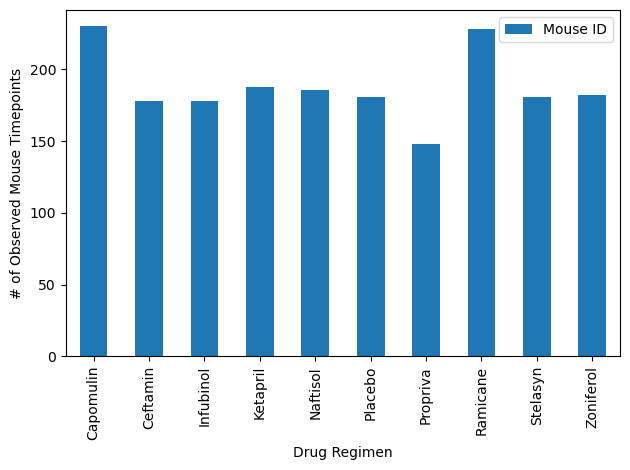

In [144]:
mouse_per_drug = clean_mouse_study.groupby("Drug Regimen")["Mouse ID"].count()
mouse_per_drug = pd.DataFrame(mouse_per_drug)
# mouse_per_drug

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_per_drug.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

#This bar chart is not organized from greatest to least, but the information it's showing is accurate to the data


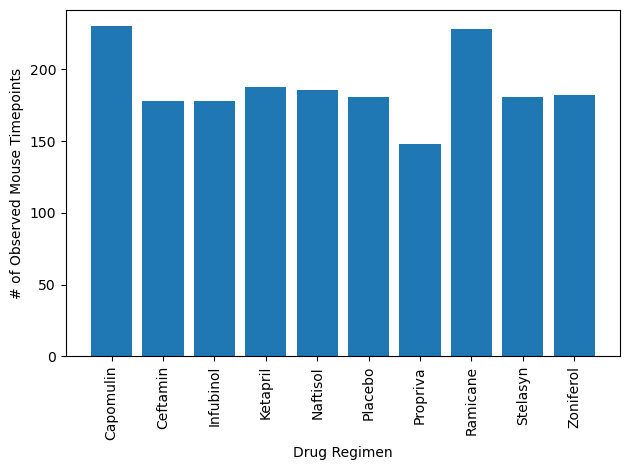

In [145]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_types = mouse_per_drug.index.tolist()
total_mice = mouse_per_drug["Mouse ID"].tolist()


plt.bar(drug_types, total_mice, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#This bar chart is not organized from greatest to least, but the information it's showing is accurate to the data

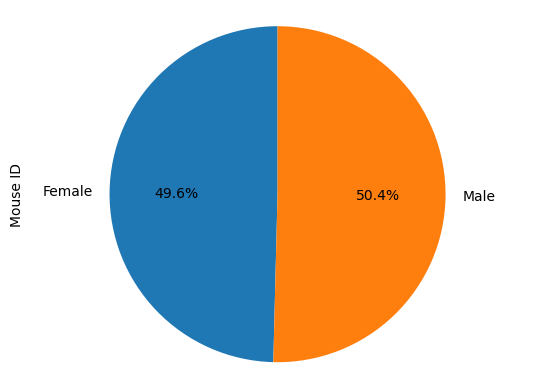

In [146]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mouse_study.drop_duplicates(subset=["Mouse ID","Sex"])


unique_mice_count = unique_mice.groupby("Sex")["Mouse ID"].count()

unique_mice_count.plot(kind="pie", labels=unique_mice_count.index, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

# Make the pie chart


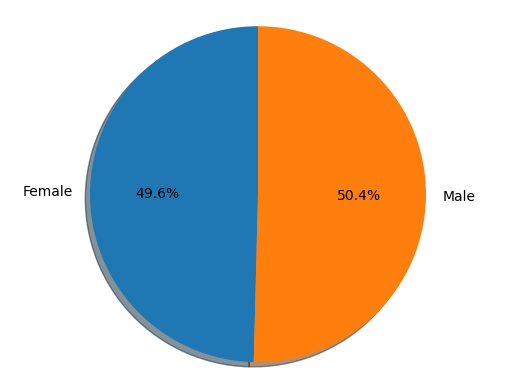

In [147]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_count = unique_mice.groupby("Sex")["Mouse ID"].count()
unique_mice_count
sex = unique_mice_count.index.tolist()
total_mice = unique_mice_count.tolist()


# Make the pie chart
plt.pie(total_mice, labels=sex, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_study.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_mouse_study = clean_mouse_study.merge(last_timepoint, on = "Mouse ID", how="inner")
last_timepoint_mouse_study = last_timepoint_mouse_study.rename(columns={"Timepoint_x":"Timepoint","Timepoint_y":"Last Timepoint"})

#I modified this dataframe to only include the rows where Timepoint = Last Timepoint because now, all of the tumor
    #volumes remaining are at the last timepoint
last_timepoint_mouse_study = last_timepoint_mouse_study[last_timepoint_mouse_study["Timepoint"]==last_timepoint_mouse_study["Last Timepoint"]]
last_timepoint_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
20,x336,0,45.000000,0,Naftisol,Female,4,29,0
53,h428,0,45.000000,0,Ketapril,Female,1,27,0
55,v199,0,45.000000,0,Naftisol,Female,17,29,0
108,o848,0,45.000000,0,Stelasyn,Female,14,27,0
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [149]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_dict = {treatment: [] for treatment in treatments}

    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_timepoint_mouse_study.iterrows():
    if row["Drug Regimen"] in treatments:
        tumor_volume_dict[row["Drug Regimen"]].append(row["Tumor Volume (mm3)"])

tumor_volume_treatmeant = pd.DataFrame(tumor_volume_dict)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = last_timepoint_mouse_study["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # add subset
for treatment in treatments:
    # Filter data for the current treatment group
    treatment_data = last_timepoint_mouse_study.loc[last_timepoint_mouse_study['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine upper and lower bounds for outliers
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # Identify potential outliers
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Determine outliers using upper and lower bounds
    print(f"---------------------------------")
    print(f"Results for {treatment}")
    print(f"---------------------------------")
    print(f"IQR for {treatment}: {iqr}")
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    print(f"Potential outliers for {treatment}: {outliers}")
    print(f"---------------------------------")




---------------------------------
Results for Capomulin
---------------------------------
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------
---------------------------------
Results for Ramicane
---------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------
---------------------------------
Results for Infubinol
---------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Potential outliers for Infubinol: 416    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------

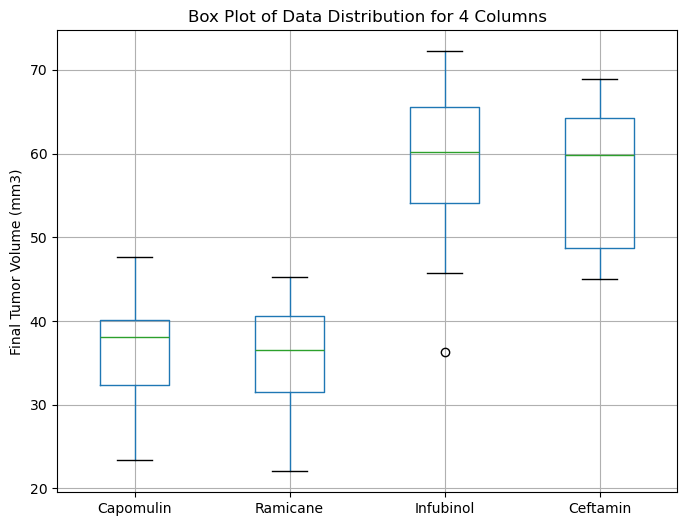

In [150]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volume_treatmeant.boxplot(figsize=(8, 6))
plt.title('Box Plot of Data Distribution for 4 Columns')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

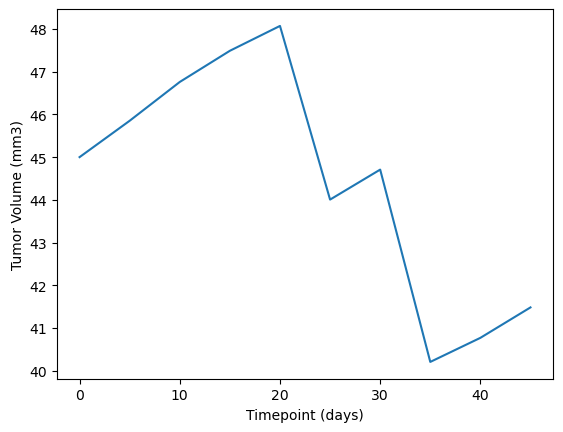

In [151]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Cap_mouse = "l509"
Cap_mouse_df = clean_mouse_study[clean_mouse_study["Mouse ID"] == Cap_mouse][["Tumor Volume (mm3)","Timepoint"]]
Cap_mouse_df
timepoint = Cap_mouse_df["Timepoint"]
cap_mouse_tumor = Cap_mouse_df["Tumor Volume (mm3)"]

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(timepoint,cap_mouse_tumor)
plt.show()

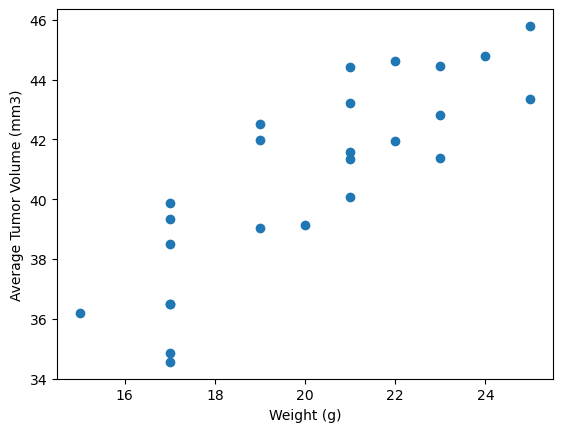

In [152]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap = "Capomulin"

#This gives me all of the results for Capomulin regimen, I need 
cap_results = clean_mouse_study[clean_mouse_study["Drug Regimen"] == cap][["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
mean_weight = cap_results.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_tumor = cap_results.groupby("Mouse ID")["Weight (g)"].mean()
cap_results = pd.merge(mean_weight, mean_tumor, left_index =True, right_index=True)

weight = cap_results["Weight (g)"]
avg_tumor = cap_results["Tumor Volume (mm3)"]

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(weight,avg_tumor)
plt.show()

## Correlation and Regression

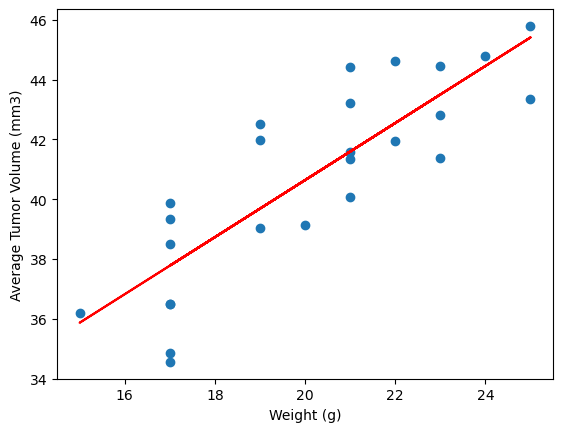

The correlation between mouse weight and the average tumor volume is 0.84


In [153]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,avg_tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")